## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scipy.special
    
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

## Utils

In [3]:
def load_benchmark(path):
    return pd.read_csv(path, delimiter='\t')

def plot_benchmark(benchmark_list, labels, colors, image_name, display_legend = True):
    plt.figure(figsize=(12, 10))
    
    for i in range(len(benchmark_list)):
        plt.plot(benchmark_list[i]['param-size'], benchmark_list[i]['value'], label=labels[i], color=colors[i])

    plt.ylabel('ms')
    plt.xlabel('size')
    if display_legend:
        plt.legend(loc=0)
    plt.savefig('images/' + image_name + '.svg', bbox_inches='tight', format="svg")
    

## Big-O Pictorial Definition

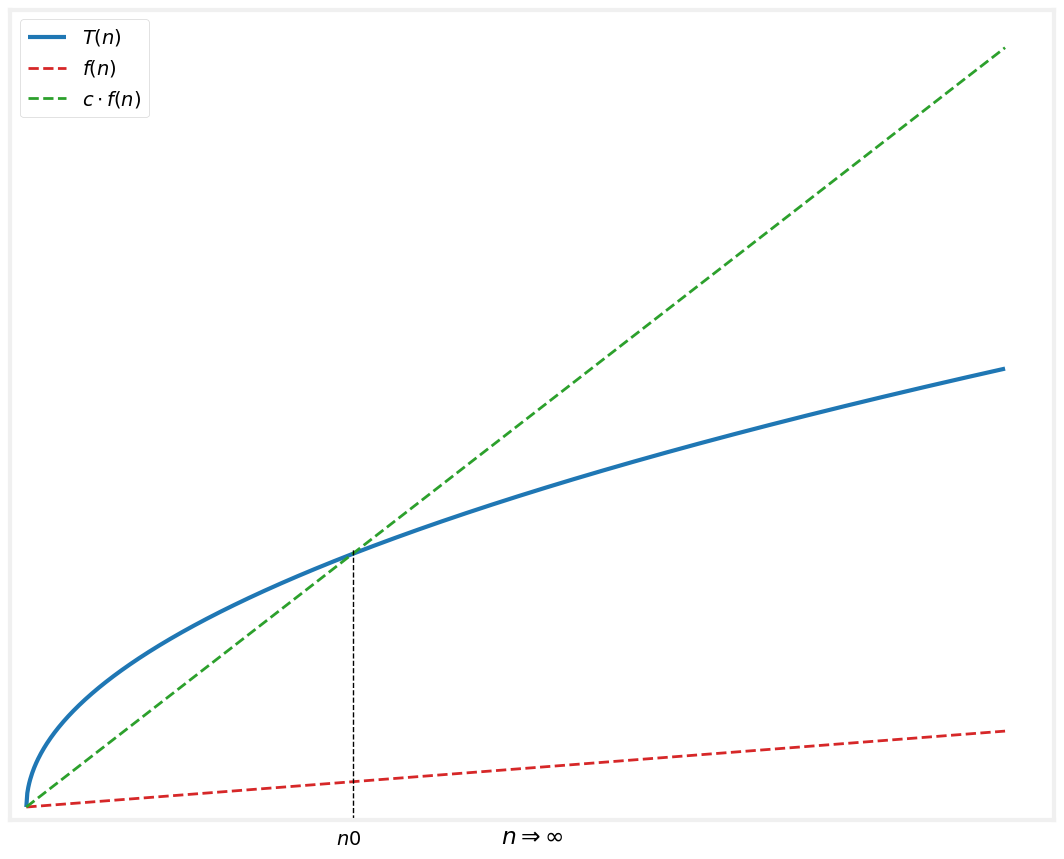

In [7]:
n = np.linspace(0, 0.3, 1000)
labels = ["$ T(n) $", "$ f(n) $", "$ c \\cdot f(n) $"]
big_o = [np.sqrt(10 * n), n, 10 * n,]
colors =['tab:blue', 'tab:red', 'tab:green']
lwidth = [3, 2, 2]
lwidth = [3, 2, 2]
styles = ['-', '--', '--'] 

plt.figure(figsize=(12, 10))

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], color=colors[i], linewidth=lwidth[i], linestyle = styles[i])
    
plt.axvline(x = 0.1, color = 'black', linewidth=1, linestyle='--', ymax = 0.336)
plt.ylim(ymin=-0.05)
plt.xlim(xmin=-0.005)
plt.xlabel("$ n \\Rightarrow \\infty $")
plt.text(0.095, -0.15, "$ n0 $")
plt.xticks([])
plt.yticks([])
plt.legend(loc=0)
plt.savefig('images/big-o-definition.svg', bbox_inches='tight', format="svg")

## Big-Omega Pictorial Definition

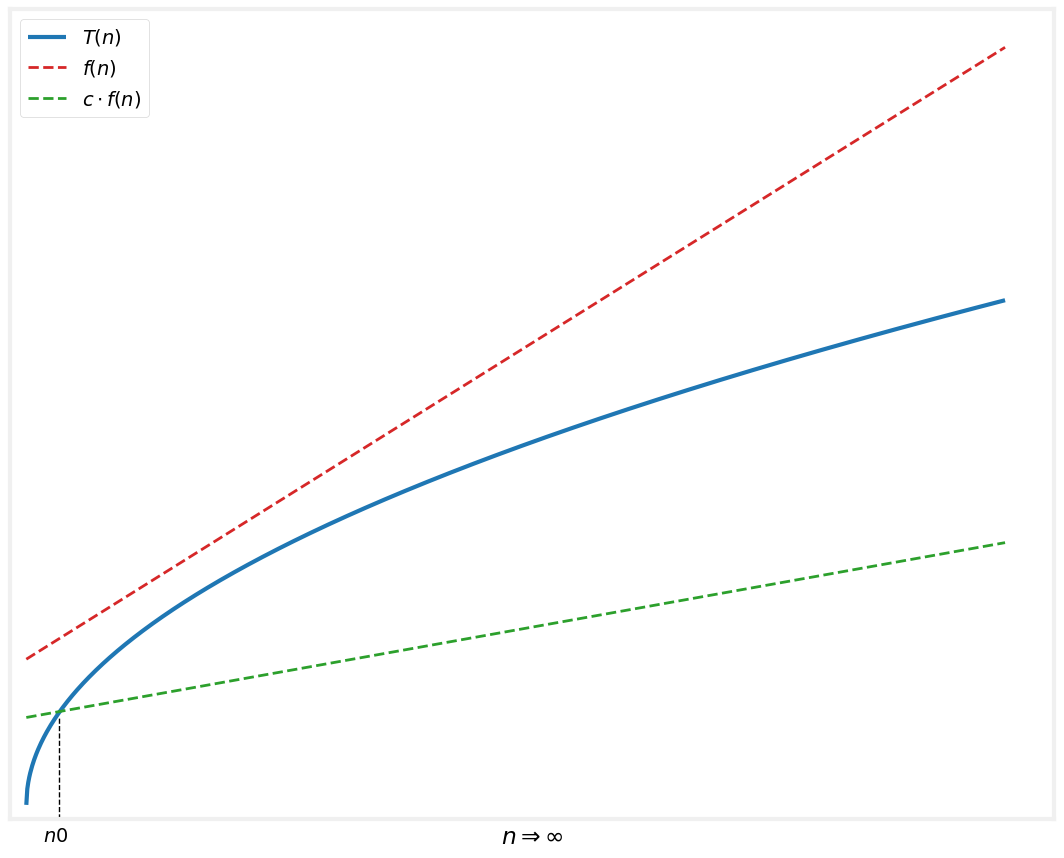

In [10]:
n = np.linspace(0, 0.3, 1000)
labels = ["$ T(n) $", "$ f(n) $", "$ c \\cdot f(n) $"]
big_o = [np.sqrt(10 * n), 7 * n + 0.5, 2*n + 0.3]
colors =['tab:blue', 'tab:red', 'tab:green']
lwidth = [3, 2, 2]
lwidth = [3, 2, 2]
styles = ['-', '--', '--'] 

plt.figure(figsize=(12, 10))

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], color=colors[i], linewidth=lwidth[i], linestyle = styles[i])
    
plt.axvline(x = 0.01, color = 'black', linewidth=1, linestyle='--', ymax = 0.126)
plt.ylim(ymin=-0.05)
plt.xlim(xmin=-0.005)
plt.xlabel("$ n \\Rightarrow \\infty $")
plt.text(0.005, -0.125, "$ n0 $")
plt.xticks([])
plt.yticks([])
plt.legend(loc=0)
plt.savefig('images/big-omega-definition.svg', bbox_inches='tight', format="svg")


## Big-Theta Pictorial Definition

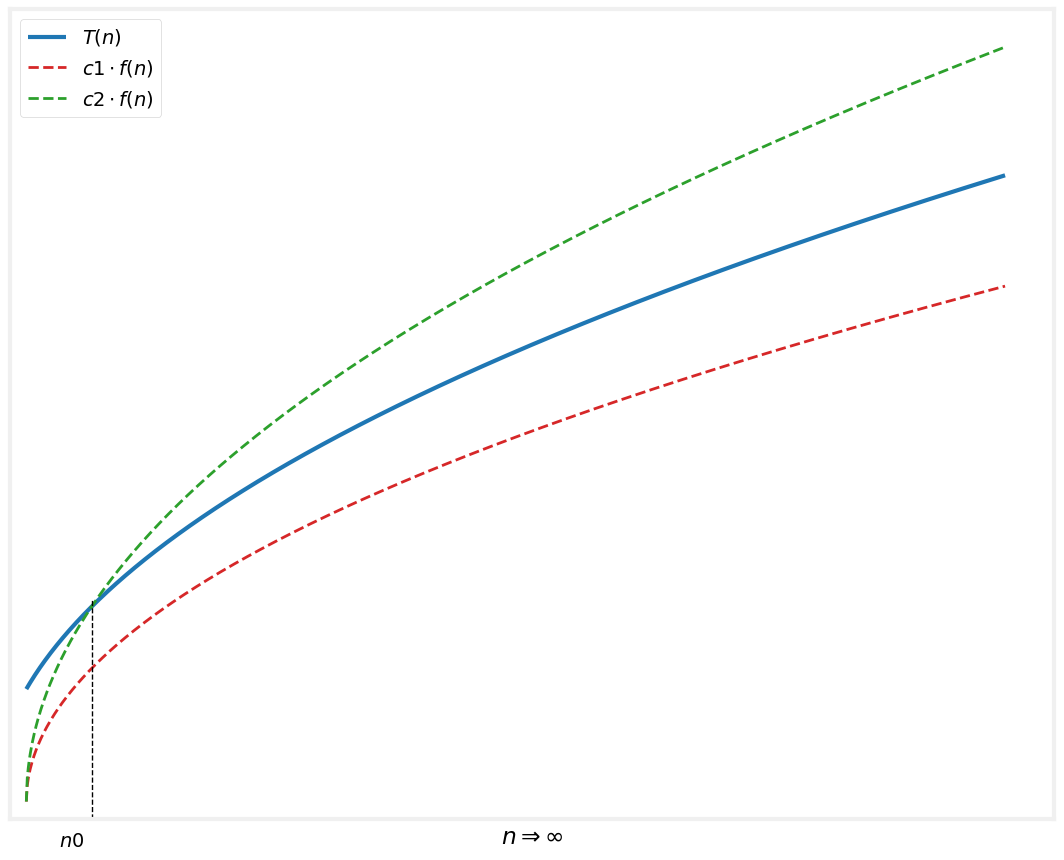

In [49]:
n = np.linspace(0, 0.3, 1000)
labels = ["$ T(n) $", "$ c1 \\cdot f(n) $", "$ c2 \\cdot f(n) $"]
big_o = [np.sqrt(10 * (n + 0.01)), np.sqrt(7 * n), np.sqrt(15 * n)]
colors =['tab:blue', 'tab:red', 'tab:green']
lwidth = [3, 2, 2]
lwidth = [3, 2, 2]
styles = ['-', '--', '--'] 

plt.figure(figsize=(12, 10))

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], color=colors[i], linewidth=lwidth[i], linestyle = styles[i])
    
plt.axvline(x = 0.02, color = 'black', linewidth=1, linestyle='--', ymax = 0.271)
plt.ylim(ymin=-0.05)
plt.xlim(xmin=-0.005)
plt.xlabel("$ n \\Rightarrow \\infty $")
plt.text(0.01, -0.125, "$ n0 $")
plt.xticks([])
plt.yticks([])
plt.legend(loc=0)
plt.savefig('images/big-theta-definition.svg', bbox_inches='tight', format="svg")

## Little-O Pictorial Definition

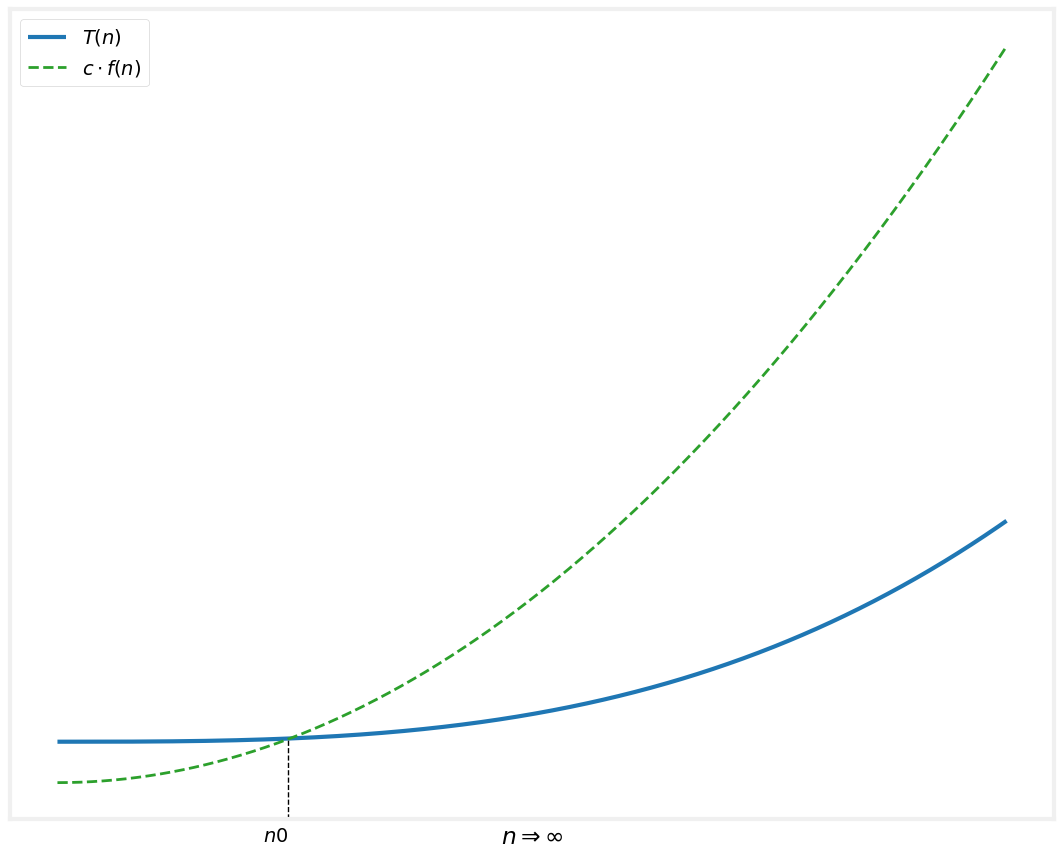

In [83]:
n = np.linspace(0, 0.3, 1000)
labels = ["$ T(n) $", "$ c \\cdot f(n) $"]
big_o = [n*n*n + 0.005, n*n]
colors =['tab:blue','tab:green']
lwidth = [3, 2]
lwidth = [3, 2]
styles = ['-', '--'] 

plt.figure(figsize=(12, 10))

for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], color=colors[i], linewidth=lwidth[i], linestyle = styles[i])
    
plt.axvline(x = 0.073, color = 'black', linewidth=1, linestyle='--', ymax = 0.1)
plt.xlabel("$ n \\Rightarrow \\infty $")
plt.text(0.065, -0.0072, "$ n0 $")
plt.xticks([])
plt.yticks([])
plt.legend(loc=0)
plt.savefig('images/little-o-definition.svg', bbox_inches='tight', format="svg")

## Search

In [10]:
list_linear_search_df = load_benchmark('data/Search.listSearch.Test-0.dsv')
array_linear_search_df = load_benchmark('data/Search.arraySearch.Test-1.dsv')
binary_search_df = load_benchmark('data/Search.binarySearch.Test-2.dsv')

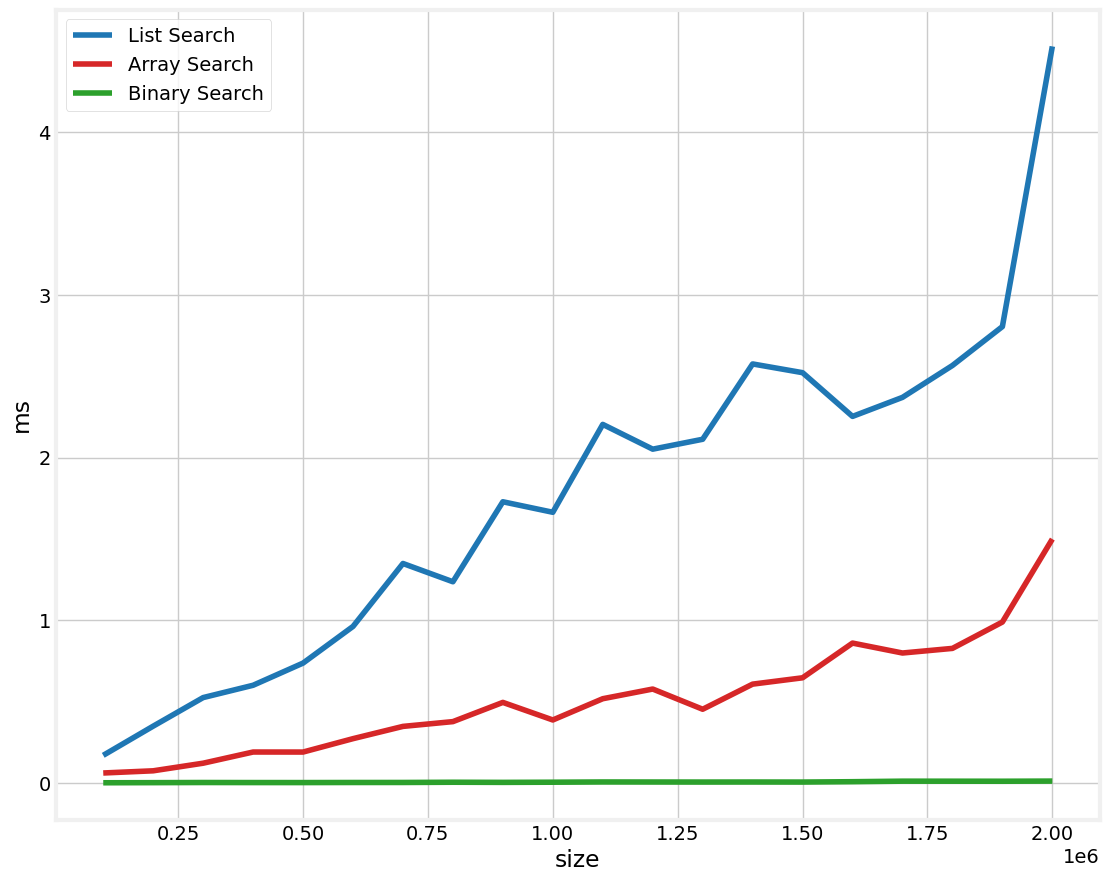

In [30]:
plot_benchmark([list_linear_search_df, array_linear_search_df, binary_search_df],\
               ['List Search', 'Array Search', 'Binary Search'],\
               ['tab:blue', 'tab:red', 'tab:green'], 'search')

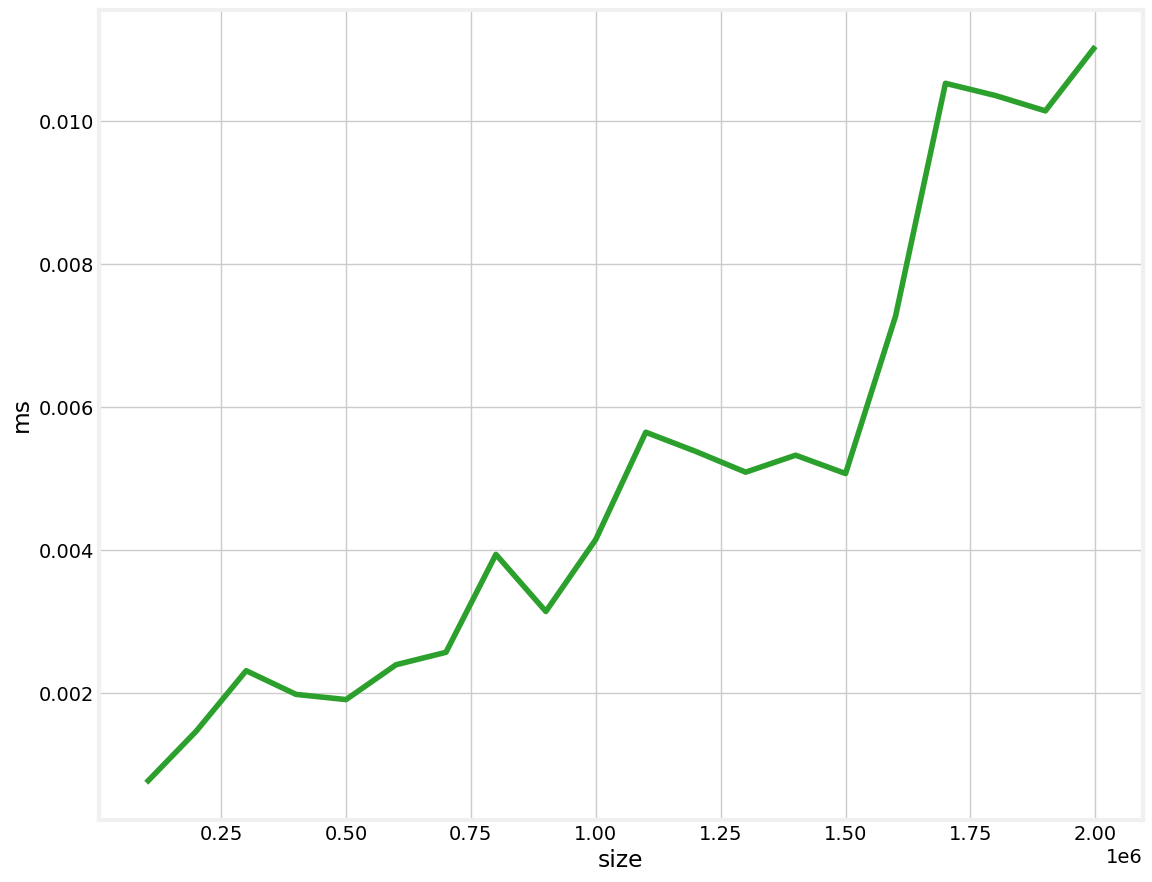

In [31]:
plot_benchmark([binary_search_df], ['Binary Search'], ['tab:green'],'binary-search', False)

## Sort

In [32]:
quicksort_df = load_benchmark('data/Sort.quickSort.Test-0.dsv')
sorted_quicksort_df = load_benchmark('data/Sort.sortedQuickSort.Test-1.dsv')
copy_array_df = load_benchmark('data/Sort.copyArray.Test-2.dsv')

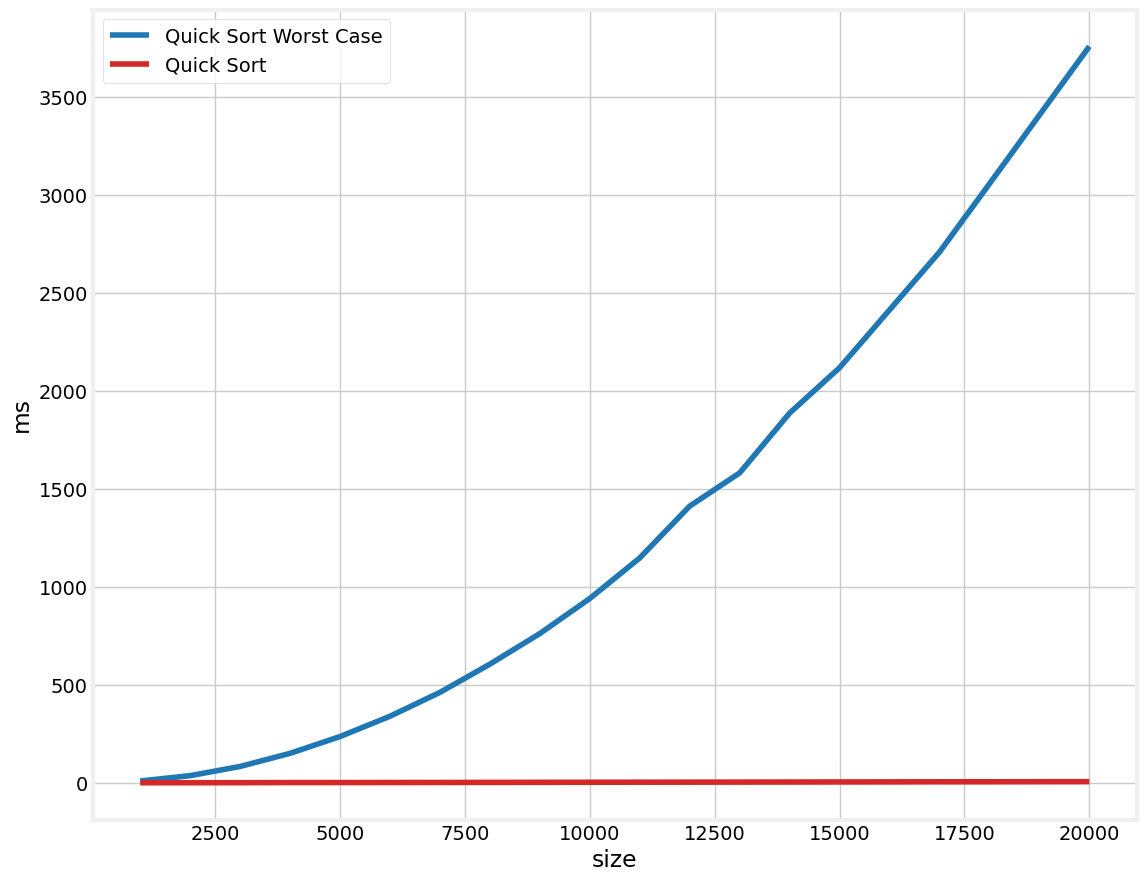

In [33]:
plot_benchmark([sorted_quicksort_df, quicksort_df],\
               ['Quick Sort Worst Case', 'Quick Sort'],\
               ['tab:blue', 'tab:red'], 'quicksort-worstcase')

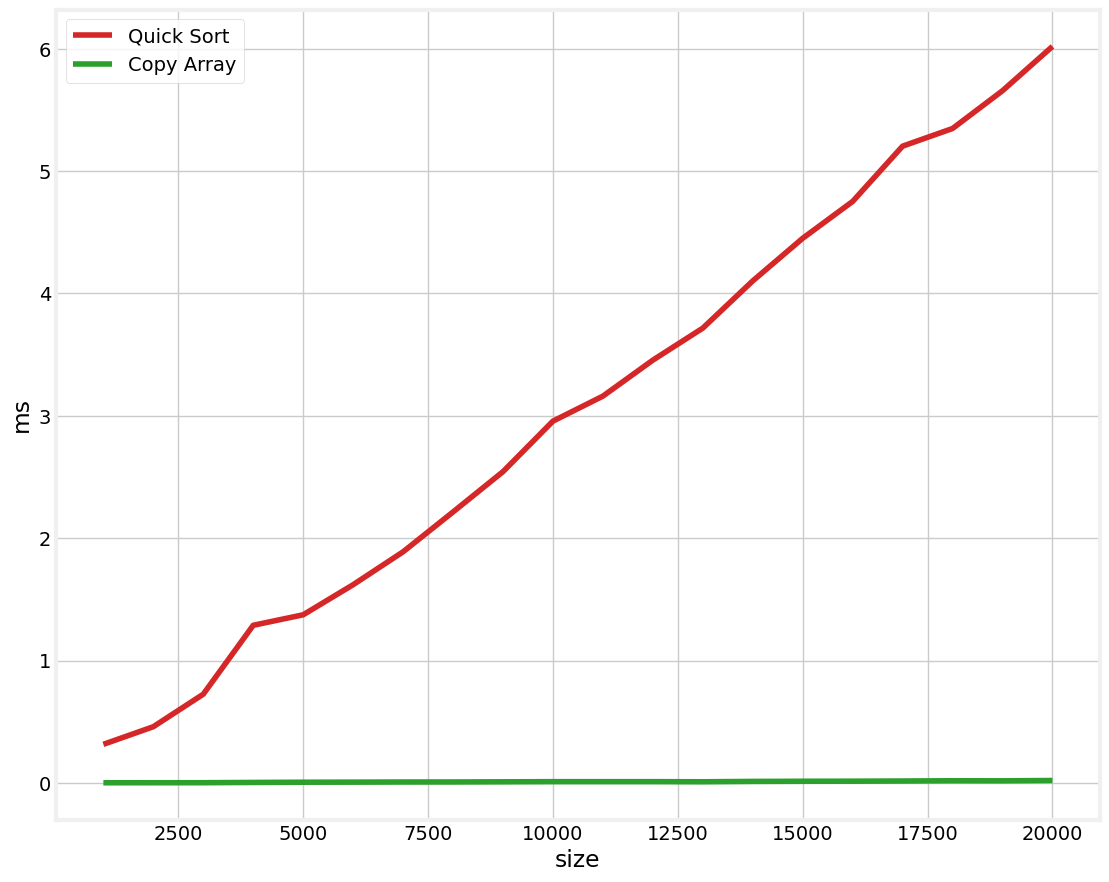

In [34]:
plot_benchmark([quicksort_df, copy_array_df],\
               ['Quick Sort', 'Copy Array'],\
               ['tab:red', 'tab:green'], 'quicksort-vs-copy-array')

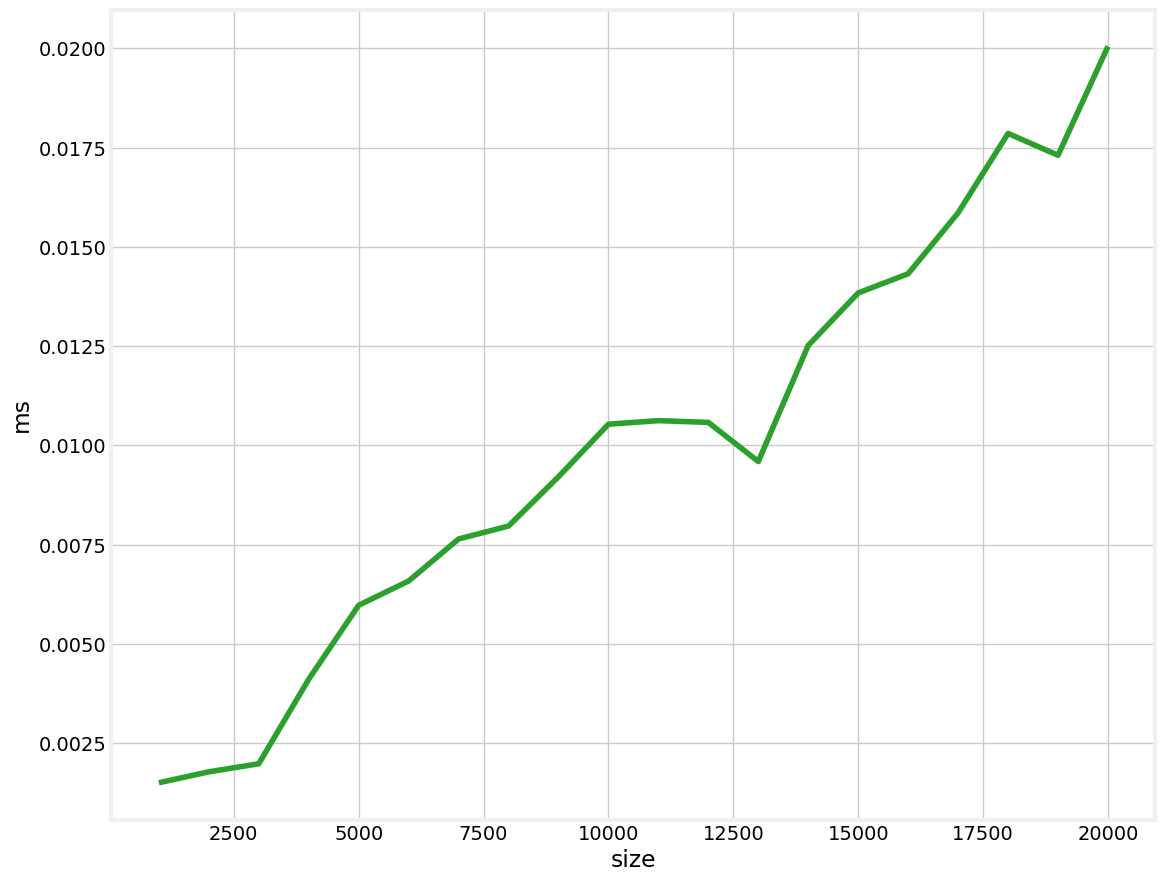

In [35]:
plot_benchmark([copy_array_df],\
               ['Copy Array'],\
               ['tab:green'], 'copy-array', False)

In [36]:
small_quicksort_df = load_benchmark('data/Sort.quickSort.Test-3.dsv')
small_insertion_sort_df = load_benchmark('data/Sort.insertionSort.Test-4.dsv')

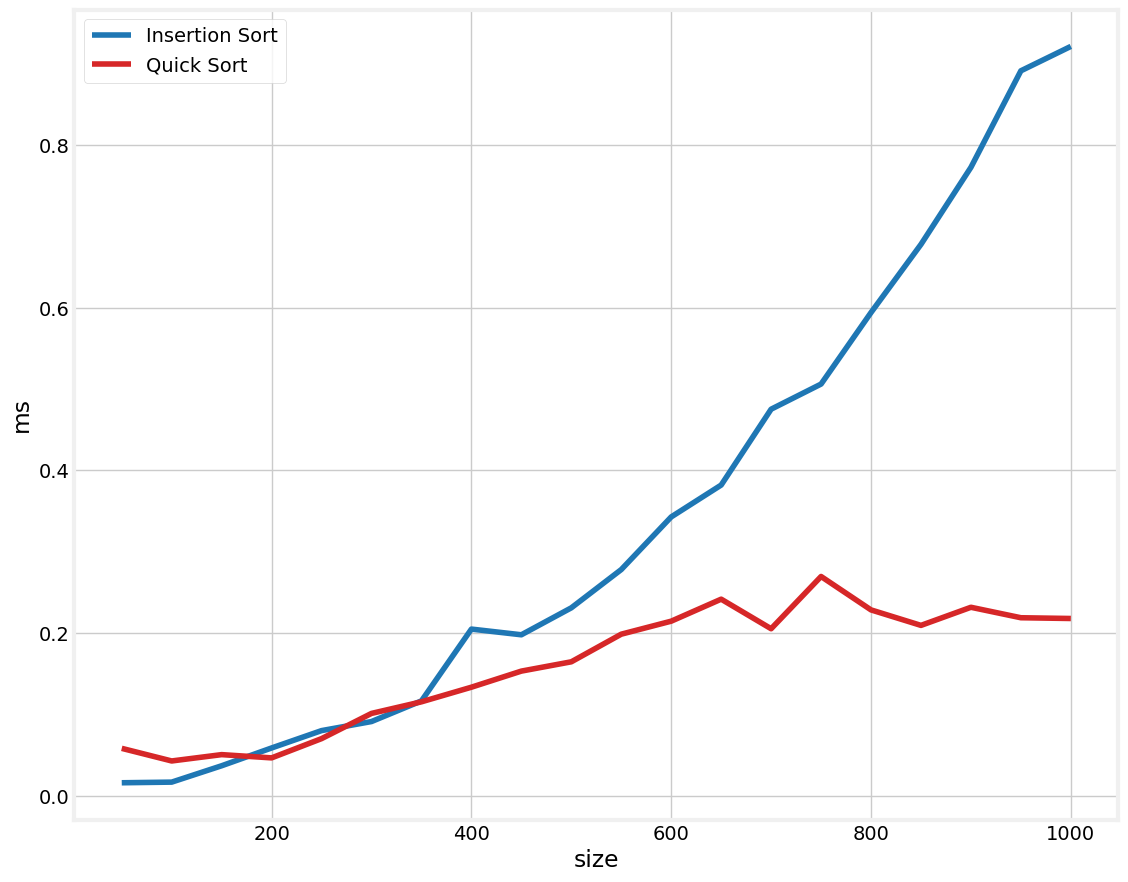

In [37]:
plot_benchmark([small_insertion_sort_df, small_quicksort_df],\
               ['Insertion Sort', 'Quick Sort'],\
               ['tab:blue', 'tab:red'], 'small-quicksort-vs-insertion-sort')

## Complexities

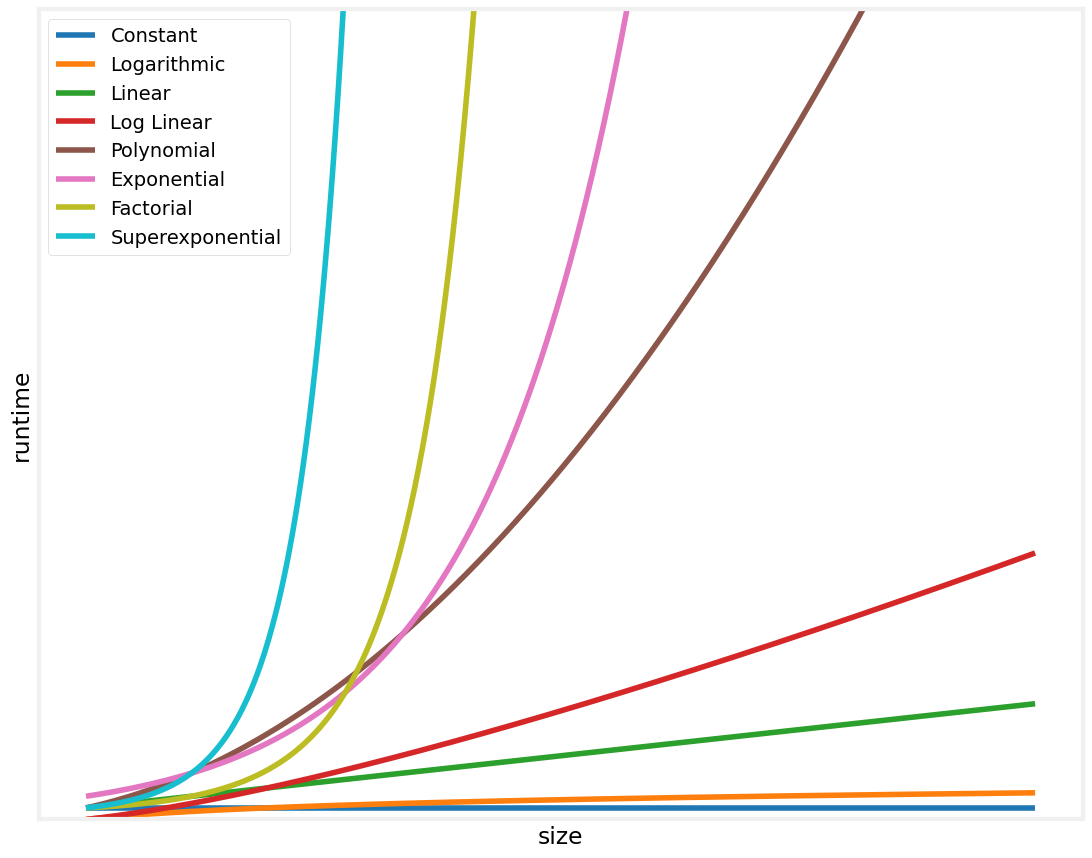

In [39]:
# Set up runtime comparisons
n = np.linspace(1, 10, 1000)
labels = ['Constant', 'Logarithmic', 'Linear', 'Log Linear', 'Polynomial', 'Exponential', 'Factorial', "Superexponential"]
big_o = [np.ones(n.shape), np.log(n), n, n * np.log(n), n**2, 2**n, scipy.special.factorial(n), n**n]
colors =['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']

# Plot setup
plt.figure(figsize=(12, 10))
plt.ylim(0, 70)


for i in range(len(big_o)):
    plt.plot(n, big_o[i], label=labels[i], color=colors[i])

plt.legend(loc=0)
plt.ylabel('runtime')
plt.xlabel('size')
plt.xticks([])
plt.yticks([])
plt.savefig('images/big-o-notation.svg', bbox_inches='tight', format="svg")